In [1]:
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from numerical_methods.root_finding_1_var import (
    Bisection,
    Fixed_Point,
    Newton,
    Secant,
)



In [2]:
def f1(x):
    return jnp.sin(jnp.power((x - 1), 2)) / 2


def f2(x):
    return jnp.power(5, -1 * x) - 2


def plot_fn(
    f, r=(0, 1), title="f(x)", xlabel="x", ylabel="f(x)"
):
    plt.figure()
    x = jnp.linspace(*r)
    y = f(x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x, jnp.zeros(jnp.shape(x)))
    plt.plot(x, y)

def to_abs_err(df, real_root):
    return df.applymap(
        lambda x: jnp.abs(real_root - x)
    ).astype(jnp.float64)



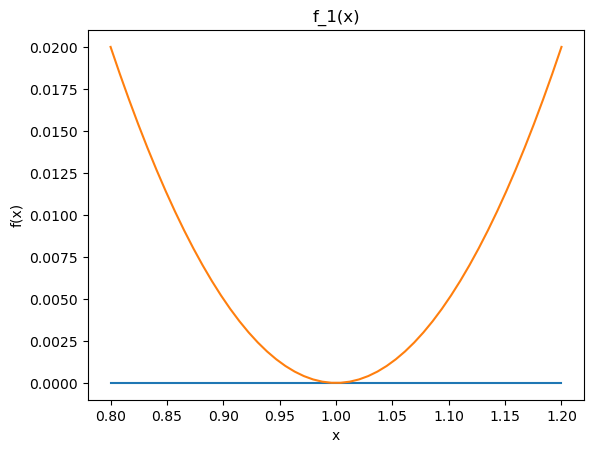

In [3]:
plot_fn(f1, r=(0.8, 1.2), title="f_1(x)")

In [4]:
f1_res = pd.DataFrame(
    {
        "Bisection": Bisection(f1, (0.8, 1)),
        "Fixed_Point": Fixed_Point(
            f1, 3, g=lambda x: jnp.sqrt(jnp.arcsin(0)) + 1
        ),
        "Newton": Newton(f1, 0.8),
        "Secant": Secant(f1, (0.8, 0.9)),
    }
)
f1_res

,Bisection,Fixed_Point,Newton,Secant
0,0.900000,3.0,0.8,0.8
1,0.950000,1.0,0.9000534,0.9
2,0.975000,1.0,0.95002836,0.9333444
3,0.987500,1.0,0.9750142,0.9600046
4,0.993750,1.0,0.9875071,0.9750034
5,0.996875,1.0,0.99375355,0.98461735
6,0.998437,1.0,0.9968768,0.99047744
7,0.999219,1.0,0.99843836,0.9941184
8,0.999609,1.0,0.9992192,0.9963641
9,0.999805,1.0,0.9996096,0.9977531


In [5]:
f1_err = to_abs_err(f1_res, 1)
f1_err



,Bisection,Fixed_Point,Newton,Secant
0,0.100000,2.0,0.200000,0.200000
1,0.050000,0.0,0.099947,0.100000
2,0.025000,0.0,0.049972,0.066656
3,0.012500,0.0,0.024986,0.039995
4,0.006250,0.0,0.012493,0.024997
5,0.003125,0.0,0.006246,0.015383
6,0.001563,0.0,0.003123,0.009523
7,0.000781,0.0,0.001562,0.005882
8,0.000391,0.0,0.000781,0.003636
9,0.000195,0.0,0.000390,0.002247


<AxesSubplot:title={'center':'Comparison of Absolute Errors Approximating Root of f_1'}, xlabel='iteration', ylabel='Abs. Err'>

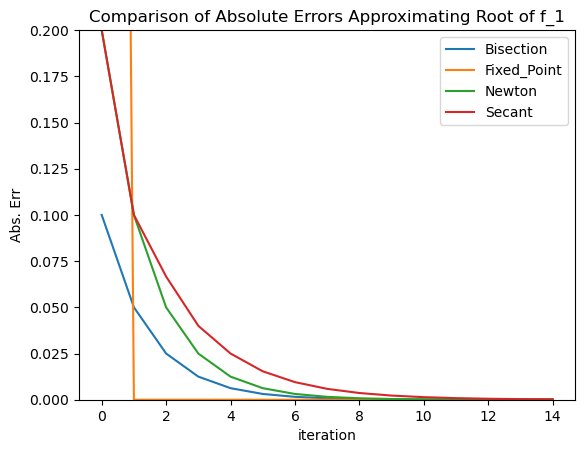

In [6]:
f1_err["iteration"] = list(range(15))
f1_err.plot(
    x="iteration",
    y=["Bisection", "Fixed_Point", "Newton", "Secant"],
    title="Comparison of Absolute Errors Approximating Root of f_1",
    legend=True,
    ylim=(0, 0.2),
    ylabel="Abs. Err",
)

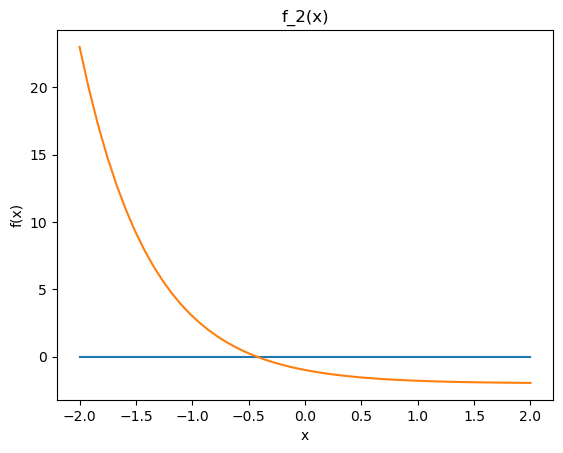

In [7]:

plot_fn(f2, r=(-2, 2), title="f_2(x)")

In [8]:
f2_res = pd.DataFrame(
    {
        "Bisection": Bisection(f2, (-2, 2)),
        "Fixed_Point": Fixed_Point(f2, -0.43066),
        "Newton": Newton(f2, -2),
        "Secant": Secant(f2, (-2, -1)),
    }
)
f2_res

,Bisection,Fixed_Point,Newton,Secant
0,0.000000,-0.43066,-2.0,-2.0
1,-1.000000,-0.43060672,-1.4283719,-1.0
2,-0.500000,-0.43060672,-0.93176574,-0.85
3,-0.250000,-0.43060672,-0.58781356,-0.58039016
4,-0.375000,-0.43060672,-0.4489724,-0.474132
5,-0.437500,-0.43060672,-0.4309433,-0.43564796
6,-0.406250,-0.43060672,-0.43067664,-0.43084815
7,-0.421875,-0.43060672,-0.43067658,-0.43067724
8,-0.429688,-0.43060672,-0.43067658,-0.43067658
9,-0.433594,-0.43060672,-0.43067658,-0.43067658


<AxesSubplot:title={'center':'Comparison of Absolute Errors Approximating Root of f_2'}, xlabel='iteration', ylabel='Abs. Err'>

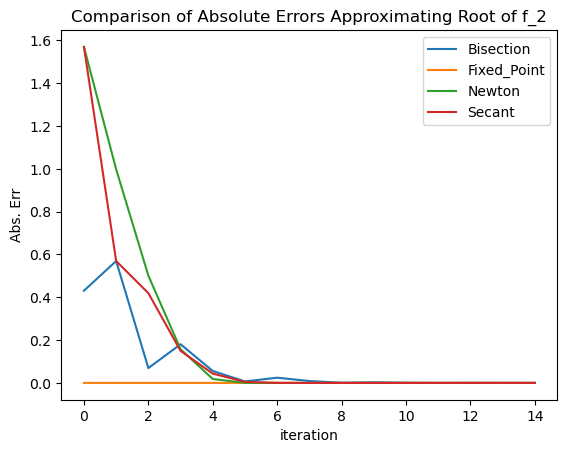

In [9]:

f2_err = to_abs_err(f2_res, -jnp.log(2) / jnp.log(5))

f2_err["iteration"] = list(range(15))
f2_err.plot(
    x="iteration",
    y=["Bisection", "Fixed_Point", "Newton", "Secant"],
    title="Comparison of Absolute Errors Approximating Root of f_2",
    legend=True,
    ylabel="Abs. Err",
)